## Yummly recipe data analysis and modeling

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
yummly_df = pd.read_pickle('yummly_df.pkl')

In [4]:
yummly_df.head()

,bitter,course,cuisine,ingredients,meaty,piquant,rating,recipe_name,salty,sour,sweet
0,0.666667,[Main Dishes],american,"['dried pasta', 'milk', 'shredded cheddar cheese', 'salt', 'dijon mustard']",0.166667,0.166667,4,Revolutionary Mac & Cheese,0.833333,0.166667,0.166667
1,0.500000,[Salads],american,"['tomatoes', 'avocado', 'red onion', 'chopped cilantro', 'lime', 'extra-virgin olive oil', 'salt']",0.166667,0.000000,4,Avocado and Tomato Salad,0.166667,0.833333,0.166667
2,NaN,"[Breakfast and Brunch, Breads]",american,"['melted butter', 'biscuit dough', 'fresh mozzarella', 'bacon', 'shredded cheddar cheese']",NaN,NaN,5,Easy Cheesy Bacon Biscuit Pull-Aparts,NaN,NaN,NaN
3,NaN,[Side Dishes],american,"['cauliflower', 'extra-virgin olive oil', 'red pepper flakes', 'salt', 'ground black pepper']",NaN,NaN,5,Roasted Spicy Cauliflower,NaN,NaN,NaN
4,0.833333,NaN,american,"['yukon gold potatoes', 'salt', 'smoked paprika', 'olive oil']",0.166667,0.166667,5,Shakin’ Hash Browns,0.166667,0.666667,0.000000


In [5]:
yummly_df['ingredients'][0]

"['dried pasta', 'milk', 'shredded cheddar cheese', 'salt', 'dijon mustard']"

Now I'm going to convert the string representation of my list of ingredients to an actual list.  I found a handy library which will do that for me called ast.

In [6]:
import ast

In [7]:
yummly_df['ingredients'] = yummly_df['ingredients'].apply(lambda x: ast.literal_eval(x))

In [8]:
yummly_df.head()

,bitter,course,cuisine,ingredients,meaty,piquant,rating,recipe_name,salty,sour,sweet
0,0.666667,[Main Dishes],american,"[dried pasta, milk, shredded cheddar cheese, salt, dijon mustard]",0.166667,0.166667,4,Revolutionary Mac & Cheese,0.833333,0.166667,0.166667
1,0.500000,[Salads],american,"[tomatoes, avocado, red onion, chopped cilantro, lime, extra-virgin olive oil, salt]",0.166667,0.000000,4,Avocado and Tomato Salad,0.166667,0.833333,0.166667
2,NaN,"[Breakfast and Brunch, Breads]",american,"[melted butter, biscuit dough, fresh mozzarella, bacon, shredded cheddar cheese]",NaN,NaN,5,Easy Cheesy Bacon Biscuit Pull-Aparts,NaN,NaN,NaN
3,NaN,[Side Dishes],american,"[cauliflower, extra-virgin olive oil, red pepper flakes, salt, ground black pepper]",NaN,NaN,5,Roasted Spicy Cauliflower,NaN,NaN,NaN
4,0.833333,NaN,american,"[yukon gold potatoes, salt, smoked paprika, olive oil]",0.166667,0.166667,5,Shakin’ Hash Browns,0.166667,0.666667,0.000000


Next I'd like to clean the recipe_name column and tokenize it.

In [9]:
def clean_recipe_name(df):
    df['recipe_name'] = df['recipe_name'].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df['recipe_name'] = df['recipe_name'].str.replace(r"&","")
    df['recipe_name'] = df['recipe_name'].str.lower()
    
    return df

In [10]:
yummly_df2 = clean_recipe_name(yummly_df)

In [11]:
yummly_df2.head(5)

,bitter,course,cuisine,ingredients,meaty,piquant,rating,recipe_name,salty,sour,sweet
0,0.666667,[Main Dishes],american,"[dried pasta, milk, shredded cheddar cheese, salt, dijon mustard]",0.166667,0.166667,4,revolutionary mac cheese,0.833333,0.166667,0.166667
1,0.500000,[Salads],american,"[tomatoes, avocado, red onion, chopped cilantro, lime, extra-virgin olive oil, salt]",0.166667,0.000000,4,avocado and tomato salad,0.166667,0.833333,0.166667
2,NaN,"[Breakfast and Brunch, Breads]",american,"[melted butter, biscuit dough, fresh mozzarella, bacon, shredded cheddar cheese]",NaN,NaN,5,easy cheesy bacon biscuit pull aparts,NaN,NaN,NaN
3,NaN,[Side Dishes],american,"[cauliflower, extra-virgin olive oil, red pepper flakes, salt, ground black pepper]",NaN,NaN,5,roasted spicy cauliflower,NaN,NaN,NaN
4,0.833333,NaN,american,"[yukon gold potatoes, salt, smoked paprika, olive oil]",0.166667,0.166667,5,shakin hash browns,0.166667,0.666667,0.000000


In [12]:
cols = yummly_df2.columns
cols

Index(['bitter', 'course', 'cuisine', 'ingredients', 'meaty', 'piquant',
       'rating', 'recipe_name', 'salty', 'sour', 'sweet'],
      dtype='object')

In [13]:
mask = yummly_df2['cuisine']=='japanese'

In [14]:
yummly_df2.loc[mask,['cuisine', 'course', 'ingredients', 'bitter', 'meaty', 'piquant', 'salty', 'sour', 'sweet',
       'rating', 'recipe_name']].tail()

,cuisine,course,ingredients,bitter,meaty,piquant,salty,sour,sweet,rating,recipe_name
9983,japanese,[Condiments and Sauces],"[light brown sugar, mirin, reduced sodium soy sauce]",0.833333,0.166667,0.000000,0.833333,0.000000,0.833333,3,canal house teriyaki sauce
9984,japanese,[Main Dishes],"[napa cabbage, ground pork, dark soy sauce, sesame oil, mirin, green onions, ginger, peanut oil, soy sauce, rice vinegar, sugar, chili sauce, hot water, gyoza skins]",0.833333,0.500000,0.166667,0.833333,0.666667,0.166667,4,gyoza japanese potstickers
9985,japanese,[Main Dishes],"[ground beef, sesame oil, green onions, garlic, fresh ginger, sugar, sake, dark soy sauce, oyster sauce]",0.833333,0.833333,0.000000,0.833333,0.166667,0.333333,4,meat soboro
9986,japanese,[Lunch],"[sushi rice, water, mirin, caster, sea salt flakes, tuna, mayonnaise, roasted seaweed, cucumber, avocado, soy sauce]",0.166667,0.166667,0.000000,0.166667,0.166667,0.166667,3,tuna and avocado nori rolls
9987,japanese,[Main Dishes],"[beef, onions, carrots, potatoes, oil, water, curry sauce mix, ketchup, worchestershire, apricot jam, soy sauce, curry powder, steamed rice]",NaN,NaN,NaN,NaN,NaN,NaN,3,curry and rice


In [15]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

yummly_df2["tokens_rn"] = yummly_df2["recipe_name"].apply(tokenizer.tokenize)
yummly_df2.head()

,bitter,course,cuisine,ingredients,meaty,piquant,rating,recipe_name,salty,sour,sweet,tokens_rn
0,0.666667,[Main Dishes],american,"[dried pasta, milk, shredded cheddar cheese, salt, dijon mustard]",0.166667,0.166667,4,revolutionary mac cheese,0.833333,0.166667,0.166667,"[revolutionary, mac, cheese]"
1,0.500000,[Salads],american,"[tomatoes, avocado, red onion, chopped cilantro, lime, extra-virgin olive oil, salt]",0.166667,0.000000,4,avocado and tomato salad,0.166667,0.833333,0.166667,"[avocado, and, tomato, salad]"
2,NaN,"[Breakfast and Brunch, Breads]",american,"[melted butter, biscuit dough, fresh mozzarella, bacon, shredded cheddar cheese]",NaN,NaN,5,easy cheesy bacon biscuit pull aparts,NaN,NaN,NaN,"[easy, cheesy, bacon, biscuit, pull, aparts]"
3,NaN,[Side Dishes],american,"[cauliflower, extra-virgin olive oil, red pepper flakes, salt, ground black pepper]",NaN,NaN,5,roasted spicy cauliflower,NaN,NaN,NaN,"[roasted, spicy, cauliflower]"
4,0.833333,NaN,american,"[yukon gold potatoes, salt, smoked paprika, olive oil]",0.166667,0.166667,5,shakin hash browns,0.166667,0.666667,0.000000,"[shakin, hash, browns]"


In [16]:
yummly_df2.head(10)

,bitter,course,cuisine,ingredients,meaty,piquant,rating,recipe_name,salty,sour,sweet,tokens_rn
0,0.666667,[Main Dishes],american,"[dried pasta, milk, shredded cheddar cheese, salt, dijon mustard]",0.166667,0.166667,4,revolutionary mac cheese,0.833333,0.166667,0.166667,"[revolutionary, mac, cheese]"
1,0.500000,[Salads],american,"[tomatoes, avocado, red onion, chopped cilantro, lime, extra-virgin olive oil, salt]",0.166667,0.000000,4,avocado and tomato salad,0.166667,0.833333,0.166667,"[avocado, and, tomato, salad]"
2,NaN,"[Breakfast and Brunch, Breads]",american,"[melted butter, biscuit dough, fresh mozzarella, bacon, shredded cheddar cheese]",NaN,NaN,5,easy cheesy bacon biscuit pull aparts,NaN,NaN,NaN,"[easy, cheesy, bacon, biscuit, pull, aparts]"
3,NaN,[Side Dishes],american,"[cauliflower, extra-virgin olive oil, red pepper flakes, salt, ground black pepper]",NaN,NaN,5,roasted spicy cauliflower,NaN,NaN,NaN,"[roasted, spicy, cauliflower]"
4,0.833333,NaN,american,"[yukon gold potatoes, salt, smoked paprika, olive oil]",0.166667,0.166667,5,shakin hash browns,0.166667,0.666667,0.000000,"[shakin, hash, browns]"
5,0.833333,[Lunch],american,"[red onion, bread, cheddar cheese, unsalted butter]",0.833333,0.000000,5,best grilled cheese sandwich,0.833333,0.166667,0.166667,"[best, grilled, cheese, sandwich]"
6,NaN,[Main Dishes],american,"[sweet paprika, brown sugar, cayenne pepper, salt, freshly ground black pepper, pork baby back ribs, barbecue sauce, vegetable oil spray]",NaN,NaN,5,slow cooker ribs,NaN,NaN,NaN,"[slow, cooker, ribs]"
7,0.166667,[Main Dishes],american,"[jalapeno chilies, lemon, dried oregano, olive oil, garlic, boneless skinless chicken breasts]",0.666667,0.833333,4,chicago chicken,0.166667,0.833333,0.000000,"[chicago, chicken]"
8,1.000000,"[Main Dishes, Lunch]",american,"[ground chicken, avocado, chopped garlic, panko, jalapeno chilies, salt, pepper]",1.000000,0.666667,4,chicken avocado burgers,1.000000,1.000000,1.000000,"[chicken, avocado, burgers]"
9,NaN,[Lunch],american,"[multigrain bread, olive oil, roasted red peppers, fresh mozzarella, basil]",NaN,NaN,5,marinated roasted red pepper grilled cheese sandwich,NaN,NaN,NaN,"[marinated, roasted, red, pepper, grilled, cheese, sandwich]"


Now I'd like to attempt to get rid of stopwords or other unimportant words from my ingredients list.

In [17]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [18]:
type(ENGLISH_STOP_WORDS)

frozenset

In [19]:
def tokenize_list(l):
    new_l = [val.split(" ") for val in l]
    flat_l = [item for sublist in new_l for item in sublist]
    return flat_l

In [20]:
temp_l = tokenize_list(yummly_df2['ingredients'][0])

In [21]:
temp_l

['dried',
 'pasta',
 'milk',
 'shredded',
 'cheddar',
 'cheese',
 'salt',
 'dijon',
 'mustard']

In [22]:
yummly_df2['tokens_ingr'] = yummly_df2['ingredients'].apply(tokenize_list)

In [23]:
yummly_df2.head()

,bitter,course,cuisine,ingredients,meaty,piquant,rating,recipe_name,salty,sour,sweet,tokens_rn,tokens_ingr
0,0.666667,[Main Dishes],american,"[dried pasta, milk, shredded cheddar cheese, salt, dijon mustard]",0.166667,0.166667,4,revolutionary mac cheese,0.833333,0.166667,0.166667,"[revolutionary, mac, cheese]","[dried, pasta, milk, shredded, cheddar, cheese, salt, dijon, mustard]"
1,0.500000,[Salads],american,"[tomatoes, avocado, red onion, chopped cilantro, lime, extra-virgin olive oil, salt]",0.166667,0.000000,4,avocado and tomato salad,0.166667,0.833333,0.166667,"[avocado, and, tomato, salad]","[tomatoes, avocado, red, onion, chopped, cilantro, lime, extra-virgin, olive, oil, salt]"
2,NaN,"[Breakfast and Brunch, Breads]",american,"[melted butter, biscuit dough, fresh mozzarella, bacon, shredded cheddar cheese]",NaN,NaN,5,easy cheesy bacon biscuit pull aparts,NaN,NaN,NaN,"[easy, cheesy, bacon, biscuit, pull, aparts]","[melted, butter, biscuit, dough, fresh, mozzarella, bacon, shredded, cheddar, cheese]"
3,NaN,[Side Dishes],american,"[cauliflower, extra-virgin olive oil, red pepper flakes, salt, ground black pepper]",NaN,NaN,5,roasted spicy cauliflower,NaN,NaN,NaN,"[roasted, spicy, cauliflower]","[cauliflower, extra-virgin, olive, oil, red, pepper, flakes, salt, ground, black, pepper]"
4,0.833333,NaN,american,"[yukon gold potatoes, salt, smoked paprika, olive oil]",0.166667,0.166667,5,shakin hash browns,0.166667,0.666667,0.000000,"[shakin, hash, browns]","[yukon, gold, potatoes, salt, smoked, paprika, olive, oil]"


Next I'd like to try to throw out stop words from the ingredients list such as 'shredded','extra-virgin' or 'chopped'.  I'm going to try to analyze word frequency in order to achieve this.

In [24]:
yummly_df2['ingredients_string'] = yummly_df2['ingredients'].str.join(' ')

In [25]:
yummly_df2.head()

,bitter,course,cuisine,ingredients,meaty,piquant,rating,recipe_name,salty,sour,sweet,tokens_rn,tokens_ingr,ingredients_string
0,0.666667,[Main Dishes],american,"[dried pasta, milk, shredded cheddar cheese, salt, dijon mustard]",0.166667,0.166667,4,revolutionary mac cheese,0.833333,0.166667,0.166667,"[revolutionary, mac, cheese]","[dried, pasta, milk, shredded, cheddar, cheese, salt, dijon, mustard]",dried pasta milk shredded cheddar cheese salt dijon mustard
1,0.500000,[Salads],american,"[tomatoes, avocado, red onion, chopped cilantro, lime, extra-virgin olive oil, salt]",0.166667,0.000000,4,avocado and tomato salad,0.166667,0.833333,0.166667,"[avocado, and, tomato, salad]","[tomatoes, avocado, red, onion, chopped, cilantro, lime, extra-virgin, olive, oil, salt]",tomatoes avocado red onion chopped cilantro lime extra-virgin olive oil salt
2,NaN,"[Breakfast and Brunch, Breads]",american,"[melted butter, biscuit dough, fresh mozzarella, bacon, shredded cheddar cheese]",NaN,NaN,5,easy cheesy bacon biscuit pull aparts,NaN,NaN,NaN,"[easy, cheesy, bacon, biscuit, pull, aparts]","[melted, butter, biscuit, dough, fresh, mozzarella, bacon, shredded, cheddar, cheese]",melted butter biscuit dough fresh mozzarella bacon shredded cheddar cheese
3,NaN,[Side Dishes],american,"[cauliflower, extra-virgin olive oil, red pepper flakes, salt, ground black pepper]",NaN,NaN,5,roasted spicy cauliflower,NaN,NaN,NaN,"[roasted, spicy, cauliflower]","[cauliflower, extra-virgin, olive, oil, red, pepper, flakes, salt, ground, black, pepper]",cauliflower extra-virgin olive oil red pepper flakes salt ground black pepper
4,0.833333,NaN,american,"[yukon gold potatoes, salt, smoked paprika, olive oil]",0.166667,0.166667,5,shakin hash browns,0.166667,0.666667,0.000000,"[shakin, hash, browns]","[yukon, gold, potatoes, salt, smoked, paprika, olive, oil]",yukon gold potatoes salt smoked paprika olive oil


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
list_corpus = yummly_df2['ingredients_string'].tolist()
list_labels = yummly_df2['cuisine'].tolist()

In [28]:
vectorizer = TfidfVectorizer()
vectorizer.fit(list_corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [29]:
vector = vectorizer.transform(yummly_df2['ingredients_string'])
max_value = vector.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

In [30]:
feature_names = np.array(vectorizer.get_feature_names())
print("Features with the lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:100]]))

Features with the lowest tfidf:
['fluff' 'huckleberries' 'cornish' 'partridges' 'hens' 'vineyard'
 'burgundi' 'collect' 'premium' 'dijonnaise' 'pinch' 'perfect' 'jamón'
 'vital' 'perrins' 'lea' 'nacho' 'tradit' 'gelato' 'fresca' 'pressed'
 'four' 'toll' 'roux' 'substitut' 'snaps' 'chex' 'niçoise' 'brazil'
 'barramundi' 'candlenuts' 'garlic' 'fettuccini' 'kasuri' 'lettuc'
 'romain' 'leav' 'sturgeon' 'chees' 'skippi' 'natur' 'turkish' 'rins'
 'world' 'cara' 'mia' 'lentilles' 'du' 'cupcake' 'mm' 'pretzels'
 'valentine' 'craisins' 'cheerios' 'garni' 'creations' 'sheet' 'shrimps'
 'tail' 'traditional' 'klondike' 'super' 'amaranth' 'gourmet' 'aonori'
 'touch' 'leche' 'dulce' 'boned' 'pompeian' 'minicub' 'parslei' 'leafy'
 'pepperocini' 'pack' 'cheek' 'seitan' 'stellette' 'flageolet' 'curls'
 'eatin' 'drain' 'bianca' 'rosa' 'blackberry' 'betty' 'crocker' '100'
 'chana' 'ritz' 'dri' 'crush' 'drumstick' 'flake' 'heath' 'bowl' 'trifle'
 'flatout' 'flatbreads' 'crabs']


In [31]:
print("Features with the highest tfidf:\n{}".format(feature_names[sorted_by_tfidf[-100:]]))

Features with the highest tfidf:
['tikka' 'moscato' 'mirin' 'hazelnuts' 'biscoff' 'ricotta' 'paneer'
 'pimenton' 'saltines' 'beaten' 'pomegranate' 'cornmeal' 'brisket' 'hass'
 'icing' 'creole' 'mitsukan' 'seasoning' 'tart' 'pectin' 'mango' 'pizza'
 'liqueur' 'nonstick' 'lemonade' 'melon' 'alum' 'sofrito' 'violets'
 'buttermilk' 'liver' 'oleo' 'herbs' 'sea' 'beech' 'rose' 'biscuit'
 'papad' 'gizzards' 'orange' 'couscous' 'naan' 'melted' 'limoncello'
 'challa' 'gumbo' 'chambord' 'high' 'drippings' 'yardlong' 'champagne'
 'cottage' 'cookies' 'plantains' 'fruit' 'atta' 'oatmeal' 'citrus' 'roe'
 'sardines' 'potatoes' 'gram' 'sheepshead' 'mahi' 'boudin' 'half' 'apples'
 'strawberries' 'goya' 'lard' 'yucca' 'liquor' 'flavoring' 'semolina'
 'jarlsberg' 'dried' 'konbu' 'chicory' 'juice' 'pickling' 'cauliflower'
 'liquid' 'brats' 'bhaji' 'dates' 'coffee' 'cultured' 'spaetzle' 'ground'
 'vodka' 'grits' 'peach' 'duck' 'homemade' 'mccormick' 'jamaica' 'cabbage'
 'peanuts' 'taro' 'pudding']


The following list of words are those with the lowest idf score.  That is, those that appear frequently and are therefore deemed less important.

In [32]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with the lowest idf:\n{}".format(feature_names[sorted_by_idf[:50]]))

Features with the lowest idf:
['salt' 'oil' 'pepper' 'garlic' 'sugar' 'ground' 'butter' 'flour' 'olive'
 'onions' 'fresh' 'sauce' 'black' 'chicken' 'red' 'cheese' 'eggs' 'water'
 'tomatoes' 'onion' 'milk' 'powder' 'juice' 'green' 'cream' 'lemon'
 'white' 'cilantro' 'ginger' 'soy' 'rice' 'chopped' 'vinegar' 'all'
 'purpose' 'paprika' 'cumin' 'lime' 'parsley' 'large' 'leaves' 'corn'
 'cloves' 'broth' 'bell' 'kosher' 'brown' 'vegetable' 'dried' 'beef']


In [33]:
custom_stop_words = []
for word in ENGLISH_STOP_WORDS:
    custom_stop_words.append(word) 
    
custom_stop_words = custom_stop_words + feature_names[sorted_by_idf[:30]].tolist()

Next I'm going to do Bag-of-Words processing.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
count_vect = CountVectorizer(stop_words=custom_stop_words)

In [36]:
counts = count_vect.fit_transform(yummly_df2["ingredients_string"])  # sparse matrix with columns corresponding to words
words = count_vect.get_feature_names()  # array with words corresponding to columns

In [37]:
counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
#words

Now I'm going to try K-means clustering on my vectorized data set.

In [39]:
from sklearn.cluster import KMeans

In [40]:
number_of_clusters=10
km = KMeans(n_clusters = number_of_clusters)
km.fit(counts)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))



Top terms per cluster:
Cluster 0: vinegar large purpose kosher rice brown parsley seasoning pineapple potatoes
Cluster 1: vanilla extract large egg purpose unsalted heavy baking yolks granulated
Cluster 2: dried oregano thyme bell parsley feta basil paprika leaves cucumber
Cluster 3: virgin extra parsley vinegar cloves cucumber feta paprika bell oregano
Cluster 4: baking purpose soda buttermilk unsalted large granulated vanilla brown potatoes
Cluster 5: beef broth parsley paprika sour stock potatoes allspice bread tomato
Cluster 6: cumin paprika chopped coriander turmeric parsley cloves broth cinnamon cayenne
Cluster 7: corn beans shredded tortillas cumin salsa chilies chili cheddar chopped
Cluster 8: lime coconut leaves mint fish paste rum curry chopped rice
Cluster 9: sesame rice vinegar seeds corn starch brown breasts boneless toasted


In [42]:
number_of_clusters=25
km = KMeans(n_clusters = number_of_clusters)
km.fit(counts)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))


Top terms per cluster:
Cluster 0: rice cooked brown grain broth long vegetable peas bell carrots
Cluster 1: parmesan grated mozzarella shredded basil parsley pasta italian seasoning leaves
Cluster 2: shredded cheddar tortillas salsa sour beans beef taco chopped seasoning
Cluster 3: corn starch brown sesame vinegar light wine rice bell dark
Cluster 4: vinegar virgin extra wine cider cucumber cloves kosher parsley apple
Cluster 5: coconut paste curry lime fish leaves thai rice brown bell
Cluster 6: vanilla extract egg large purpose heavy unsalted baking yolks chocolate
Cluster 7: beans corn cumin chili salsa tortillas shredded chopped bell avocado
Cluster 8: feta cucumber crumbles kalamata oregano olives dried extra virgin parsley
Cluster 9: bell celery chopped seasoning rice bay shrimp thyme leaves dried
Cluster 10: sesame seeds rice vinegar toasted honey corn starch brown vegetable
Cluster 11: lime mint rum leaves soda ice club syrup simple light
Cluster 12: lime chopped fish orange le

K-means clustering shows that certain words show up a lot, but are not informative.  These words are like 'extra','virgin','extract','unsalted'.   I'm going to include these words in my list of stopwords before doing further analysis.

Another observation is that I feel like certain words should be hyphenated, since they always go together.  These words include 'baking-soda','baking-power','sesame-seeds'.  I'm going to do this step first before removing any stop words.

In [44]:
yummly_df3 = clean_recipe_name(yummly_df)

In [45]:
def hyphenate_key_ingredients(df_row_l):
    ingredients_to_hyphenate = ['baking soda','baking powder','sesame seeds','simple syrup',
                                'olive oil','corn starch','garam masala']
    
    new_df_row_l = []
    
    for val in df_row_l:
        #print(val)
        if val in ingredients_to_hyphenate:
            for ingredient in ingredients_to_hyphenate:
                if val in ingredient:
                    print(ingredient)
                    new_val_l = ingredient.split(' ')
                    new_val_s = '-'.join(new_val_l)
                    new_df_row_l.append(new_val_s)
                    break
        else:
            new_df_row_l.append(val)
    return new_df_row_l

In [46]:
#yummly_df3['ingredients'] = yummly_df3['ingredients'].apply(hyphenate_key_ingredients)

In [47]:
#yummly_df3.head(10)

After discussing this over with Robert, I'm going to use another approach.  I can use my original yummly_df DataFrame, which has ingredients as a string, and to a DataFrame.replace() call to replace certain words with hyphenated words.

In [48]:
def hyphenate_ingredients2(df):
    df['ingredients'].replace(regex=r'baking soda',value='baking-soda',inplace=True)
    df['ingredients'].replace(regex=r'baking powder',value='baking-powder',inplace=True)
    df['ingredients'].replace(regex=r'sesame seeds',value='sesame-seeds',inplace=True)
    df['ingredients'].replace(regex=r'simple syrup',value='simple-syrup',inplace=True)
    df['ingredients'].replace(regex=r'olive oil',value='olive-oil',inplace=True)
    df['ingredients'].replace(regex=r'corn starch',value='corn-starch',inplace=True)
    df['ingredients'].replace(regex=r'garam masala',value='garam-masala',inplace=True)
    
    return df

In [49]:
#yummly_df['ingredients'].to_string()

In [50]:
yummly_df3 = pd.read_pickle('yummly_df.pkl')
yummly_df3 = hyphenate_ingredients2(yummly_df3)

In [51]:
yummly_df3.head(5)

,bitter,course,cuisine,ingredients,meaty,piquant,rating,recipe_name,salty,sour,sweet
0,0.666667,[Main Dishes],american,"['dried pasta', 'milk', 'shredded cheddar cheese', 'salt', 'dijon mustard']",0.166667,0.166667,4,Revolutionary Mac & Cheese,0.833333,0.166667,0.166667
1,0.500000,[Salads],american,"['tomatoes', 'avocado', 'red onion', 'chopped cilantro', 'lime', 'extra-virgin olive-oil', 'salt']",0.166667,0.000000,4,Avocado and Tomato Salad,0.166667,0.833333,0.166667
2,NaN,"[Breakfast and Brunch, Breads]",american,"['melted butter', 'biscuit dough', 'fresh mozzarella', 'bacon', 'shredded cheddar cheese']",NaN,NaN,5,Easy Cheesy Bacon Biscuit Pull-Aparts,NaN,NaN,NaN
3,NaN,[Side Dishes],american,"['cauliflower', 'extra-virgin olive-oil', 'red pepper flakes', 'salt', 'ground black pepper']",NaN,NaN,5,Roasted Spicy Cauliflower,NaN,NaN,NaN
4,0.833333,NaN,american,"['yukon gold potatoes', 'salt', 'smoked paprika', 'olive-oil']",0.166667,0.166667,5,Shakin’ Hash Browns,0.166667,0.666667,0.000000


We can now see that 'olive oil' was replaced to 'olive-oil', so hyphenating worked.  Now I just need to convert ingredients to a list.

In [52]:
yummly_df3['ingredients'] = yummly_df3['ingredients'].apply(lambda x: ast.literal_eval(x))

In [53]:
yummly_df3 = clean_recipe_name(yummly_df3)

In [54]:
yummly_df3.head()

,bitter,course,cuisine,ingredients,meaty,piquant,rating,recipe_name,salty,sour,sweet
0,0.666667,[Main Dishes],american,"[dried pasta, milk, shredded cheddar cheese, salt, dijon mustard]",0.166667,0.166667,4,revolutionary mac cheese,0.833333,0.166667,0.166667
1,0.500000,[Salads],american,"[tomatoes, avocado, red onion, chopped cilantro, lime, extra-virgin olive-oil, salt]",0.166667,0.000000,4,avocado and tomato salad,0.166667,0.833333,0.166667
2,NaN,"[Breakfast and Brunch, Breads]",american,"[melted butter, biscuit dough, fresh mozzarella, bacon, shredded cheddar cheese]",NaN,NaN,5,easy cheesy bacon biscuit pull aparts,NaN,NaN,NaN
3,NaN,[Side Dishes],american,"[cauliflower, extra-virgin olive-oil, red pepper flakes, salt, ground black pepper]",NaN,NaN,5,roasted spicy cauliflower,NaN,NaN,NaN
4,0.833333,NaN,american,"[yukon gold potatoes, salt, smoked paprika, olive-oil]",0.166667,0.166667,5,shakin hash browns,0.166667,0.666667,0.000000


In [55]:
yummly_df3['tokens_ingr'] = yummly_df3['ingredients'].apply(tokenize_list)

In [56]:
yummly_df3.head()

,bitter,course,cuisine,ingredients,meaty,piquant,rating,recipe_name,salty,sour,sweet,tokens_ingr
0,0.666667,[Main Dishes],american,"[dried pasta, milk, shredded cheddar cheese, salt, dijon mustard]",0.166667,0.166667,4,revolutionary mac cheese,0.833333,0.166667,0.166667,"[dried, pasta, milk, shredded, cheddar, cheese, salt, dijon, mustard]"
1,0.500000,[Salads],american,"[tomatoes, avocado, red onion, chopped cilantro, lime, extra-virgin olive-oil, salt]",0.166667,0.000000,4,avocado and tomato salad,0.166667,0.833333,0.166667,"[tomatoes, avocado, red, onion, chopped, cilantro, lime, extra-virgin, olive-oil, salt]"
2,NaN,"[Breakfast and Brunch, Breads]",american,"[melted butter, biscuit dough, fresh mozzarella, bacon, shredded cheddar cheese]",NaN,NaN,5,easy cheesy bacon biscuit pull aparts,NaN,NaN,NaN,"[melted, butter, biscuit, dough, fresh, mozzarella, bacon, shredded, cheddar, cheese]"
3,NaN,[Side Dishes],american,"[cauliflower, extra-virgin olive-oil, red pepper flakes, salt, ground black pepper]",NaN,NaN,5,roasted spicy cauliflower,NaN,NaN,NaN,"[cauliflower, extra-virgin, olive-oil, red, pepper, flakes, salt, ground, black, pepper]"
4,0.833333,NaN,american,"[yukon gold potatoes, salt, smoked paprika, olive-oil]",0.166667,0.166667,5,shakin hash browns,0.166667,0.666667,0.000000,"[yukon, gold, potatoes, salt, smoked, paprika, olive-oil]"


In [57]:
yummly_df3['ingredients_string'] = yummly_df3['tokens_ingr'].str.join(' ')

In [58]:
list_corpus2 = yummly_df3['ingredients_string'].tolist()
list_labels2 = yummly_df3['cuisine'].tolist()

In [59]:
list_corpus2[1]

'tomatoes avocado red onion chopped cilantro lime extra-virgin olive-oil salt'

In [60]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(list_corpus2)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [61]:
tfidf = tfidf_vect.transform(yummly_df2['ingredients_string'])
max_value = tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

In [62]:
feature_names = np.array(vectorizer.get_feature_names())
print("Features with the lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:30]]))

Features with the lowest tfidf:
['fluff' 'huckleberries' 'cornish' 'partridges' 'hens' 'vineyard'
 'burgundi' 'collect' 'premium' 'dijonnaise' 'pinch' 'perfect' 'jamón'
 'vital' 'perrins' 'lea' 'nacho' 'tradit' 'gelato' 'fresca' 'pressed'
 'four' 'toll' 'roux' 'substitut' 'snaps' 'chex' 'niçoise' 'brazil'
 'barramundi']


In [63]:
print("Features with the highest tfidf:\n{}".format(feature_names[sorted_by_tfidf[-30:]]))

Features with the highest tfidf:
['yucca' 'liquor' 'flavoring' 'semolina' 'jarlsberg' 'dried' 'konbu'
 'chicory' 'juice' 'pickling' 'cauliflower' 'liquid' 'brats' 'bhaji'
 'dates' 'coffee' 'cultured' 'spaetzle' 'ground' 'vodka' 'grits' 'peach'
 'duck' 'homemade' 'mccormick' 'jamaica' 'cabbage' 'peanuts' 'taro'
 'pudding']


In [64]:
sorted_by_idf = np.argsort(tfidf_vect.idf_)
print("Features with the lowest idf:\n{}".format(feature_names[sorted_by_idf[:50]]))

Features with the lowest idf:
['salt' 'oil' 'pepper' 'garlic' 'sugar' 'ground' 'butter' 'flour' 'olive'
 'onions' 'fresh' 'sauce' 'black' 'chicken' 'red' 'cheese' 'eggs' 'water'
 'tomatoes' 'onion' 'milk' 'powder' 'juice' 'green' 'cream' 'lemon'
 'white' 'cilantro' 'ginger' 'soy' 'rice' 'chopped' 'vinegar' 'all'
 'purpose' 'paprika' 'cumin' 'lime' 'parsley' 'large' 'leaves' 'corn'
 'cloves' 'broth' 'bell' 'kosher' 'brown' 'vegetable' 'dried' 'beef']


In [65]:
custom_stop_words = []
for word in ENGLISH_STOP_WORDS:
    custom_stop_words.append(word) 
    
other_words_S = 'extra virgin extra-virgin unsalted heavy ground salt pepper water heavy granulated \
                 brown active dry warm freshly shredded nonfat large purpose breasts boneless skinless \
                 sea dried chopped oil olive fresh red green black'
other_words_l = other_words_S.split(' ')
    
custom_stop_words = custom_stop_words + other_words_l

The above list of stop words is highly subjective.  It may be that 'olive' and 'oil' should be kept in the list of allowable words.  May need to revisit this list again.

In [66]:
np.shape(custom_stop_words)

(384,)

Next I'm going to do bag of words with the new list of stop words.

In [67]:
count_vect2 = CountVectorizer(stop_words=custom_stop_words)

In [68]:
counts2 = count_vect2.fit_transform(yummly_df3["ingredients_string"])  # sparse matrix with columns corresponding to words
words2 = count_vect2.get_feature_names()  # array with words corresponding to columns

In [69]:
np.shape(words2)

(2118,)

In [70]:
number_of_clusters=25
km = KMeans(n_clusters = number_of_clusters)
km.fit(counts2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = count_vect2.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))


Top terms per cluster:
Cluster 0: vinegar garlic sugar white wine onion onions cider tomatoes cucumber
Cluster 1: garlic paprika tomatoes onions parsley cloves cumin onion tomato bell
Cluster 2: sugar butter flour vanilla eggs extract milk cream powdered cinnamon
Cluster 3: powder flour baking sugar butter eggs milk vanilla cream extract
Cluster 4: sugar onions butter potatoes milk chicken garlic eggs onion yogurt
Cluster 5: flour eggs butter sugar milk yeast bread cheese white cream
Cluster 6: coconut sauce lime milk paste curry chicken fish cilantro sugar
Cluster 7: sesame sauce soy garlic rice seeds ginger onions vinegar sugar
Cluster 8: lemon juice garlic parsley chicken oregano yogurt cumin cloves kosher
Cluster 9: sauce soy garlic chicken sesame sugar rice onions ginger corn
Cluster 10: cream sugar vanilla chocolate milk egg extract butter yolks irish
Cluster 11: bell chicken garlic onions rice celery tomatoes seasoning shrimp sausage
Cluster 12: powder chili cumin corn garlic be

Some of the words are in singular and plural form ('onion' and 'onions').  I'm going to use spacy and use the stemming feature.

In [72]:
import spacy
from nltk.stem import *

In [73]:
en_nlp = spacy.load('en_core_web_sm')

In [74]:
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

In [75]:
stemmer = PorterStemmer()

In [76]:
def custom_tokenizer2(document):
    document_list = document.split(" ")
    return [stemmer.stem(word) for word in document_list]

In [77]:
count_vect3 = CountVectorizer(tokenizer=custom_tokenizer2,stop_words=custom_stop_words)

In [78]:
counts3 = count_vect3.fit_transform(yummly_df3["ingredients_string"])  # sparse matrix with columns corresponding to words
words3 = count_vect3.get_feature_names()  # array with words corresponding to columns

In [79]:
np.shape(words3)

(1993,)

The number of words is reduced by 2114-1985=129 after doing stemming.

In [80]:
number_of_clusters=25
km = KMeans(n_clusters = number_of_clusters)
km.fit(counts3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [81]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = count_vect3.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: chicken onion garlic broth olive-oil paprika tomato cream parsley breast
Cluster 1: chees butter onion cheddar egg garlic cream parmesan bread ham
Cluster 2: seed cumin ginger garlic coriand onion powder turmer chili tomato
Cluster 3: lime juic mint rum leav sugar soda ice white club
Cluster 4: chees tortilla shred bean corn onion cream cheddar chicken chili
Cluster 5: sauc soy sugar garlic ginger onion chicken rice mirin sesam
Cluster 6: powder chili onion garlic cilantro cumin tomato lime juic jalapeno
Cluster 7: beef onion garlic paprika tomato flour broth carrot bay potato
Cluster 8: lemon juic garlic olive-oil onion chicken parsley cumin chop yogurt
Cluster 9: chees feta tomato olive-oil onion cucumb crumbl lemon garlic kalamata
Cluster 10: sugar flour yeast butter egg milk dri activ all-purpos bread
Cluster 11: sugar egg butter flour vanilla extract milk all-purpos larg powder
Cluster 12: dri garlic oregano onion olive-oil powder thyme tomato bas

This is making a lot more sense now!  Next step is to do PCA.

In [82]:
from sklearn.decomposition import TruncatedSVD

In [83]:
svd = TruncatedSVD(n_components=2)
svd.fit(counts3)
counts3_svd = svd.transform(counts3)

In [84]:
print("Original shape: {}".format(str(counts3.shape)))
print("Reduced shape: {}".format(str(counts3_svd.shape)))

Original shape: (12487, 1993)
Reduced shape: (12487, 2)


Now I'm going to try to make some pretty plots.

In [85]:
import matplotlib.pyplot as plt
import mglearn

%matplotlib notebook

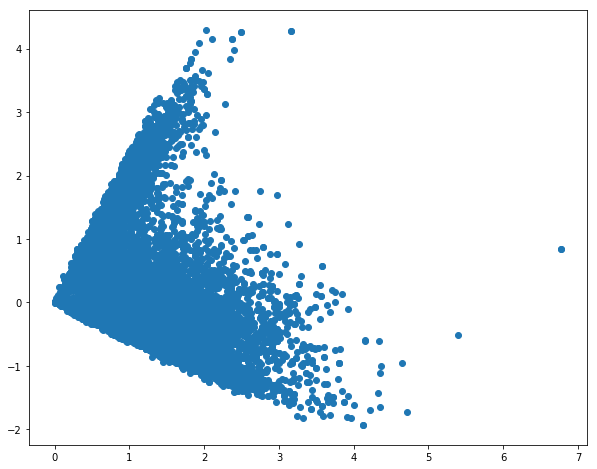

In [86]:
#fig, ax = plt.subplots(figsize=(10,8))
plt.figure(figsize=(10,8))
plt.scatter(counts3_svd[:,0],counts3_svd[:,1])

In [87]:
from sklearn.decomposition import PCA

In [88]:
counts3_array = counts3.toarray()

In [89]:
pca = PCA(n_components=2)

In [90]:
pca.fit(counts3_array)
counts3_pca = pca.transform(counts3_array)

In [91]:
print("Original shape: {}".format(str(counts3.shape)))
print("Reduced shape: {}".format(str(counts3_pca.shape)))

Original shape: (12487, 1993)
Reduced shape: (12487, 2)


In [92]:
'''plt.figure(figsize=(10,8))
plt.scatter(counts3_pca[:, 0], counts3_pca[:, 1],
            c=np.array(list_labels2), edgecolor='none', alpha=0.35,
            cmap=plt.cm.get_cmap('rainbow', 25))'''

"plt.figure(figsize=(10,8))\nplt.scatter(counts3_pca[:, 0], counts3_pca[:, 1],\n            c=np.array(list_labels2), edgecolor='none', alpha=0.35,\n            cmap=plt.cm.get_cmap('rainbow', 25))"

In [93]:
yummly_df3.cuisine.unique()

array(['american', 'italian', 'asian', 'mexican', 'southern', 'french',
       'southwestern', 'barbecue', 'indian', 'chinese', 'cajun',
       'english', 'mediterranean', 'greek', 'spanish', 'german', 'thai',
       'moroccan', 'irish', 'japanese', 'cuban', 'hawaiian', 'swedish',
       'hungarian', 'portugese'], dtype=object)

Text(0.5,1,'Cuisines of the world')

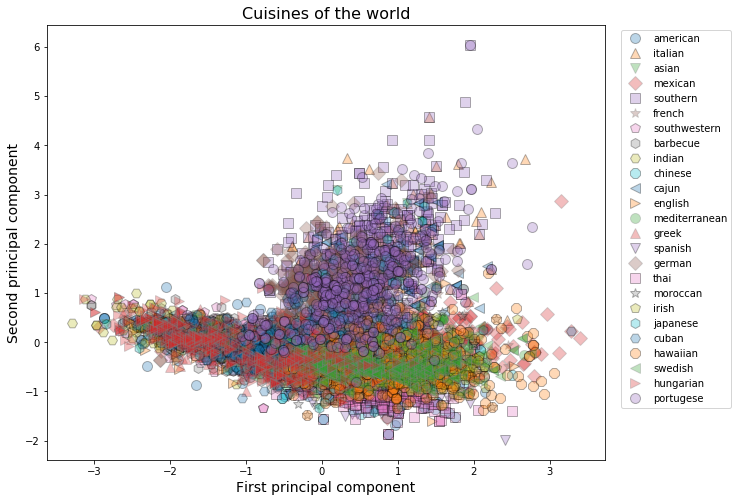

In [94]:
plt.figure(figsize=(10,8))
mglearn.discrete_scatter(counts3_pca[:,0],counts3_pca[:,1],yummly_df3.cuisine,alpha=.3)
plt.legend(['american', 'italian', 'asian', 'mexican', 'southern', 'french',
       'southwestern', 'barbecue', 'indian', 'chinese', 'cajun',
       'english', 'mediterranean', 'greek', 'spanish', 'german', 'thai',
       'moroccan', 'irish', 'japanese', 'cuban', 'hawaiian', 'swedish', 
       'hungarian', 'portugese'],bbox_to_anchor=(1.02, 1), loc=2)
plt.xlabel("First principal component",fontsize=14)
plt.ylabel("Second principal component",fontsize=14)
plt.title("Cuisines of the world",fontsize=16)
#plt.savefig('yummly_recipes_pca.png',dpi=300,bbox_inches='tight')

There is an issue with the above plot.  The data points and their labels are not necessarily the same.  Need to fix this!

In [95]:
test_S = pd.Series(np.arange(12492))
test_S.shape
test_df = pd.DataFrame({'A':np.array(['american' for _ in range(12492)], dtype=object)})
test_df.A.shape


(12492,)

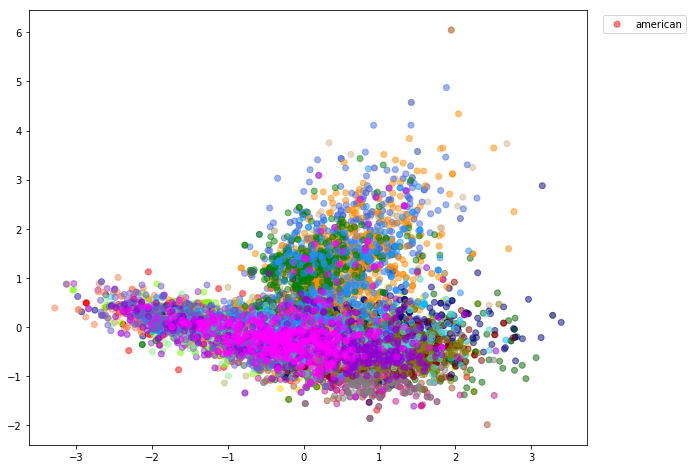

In [96]:
plt.figure(figsize=(10,8))
#plt.scatter(counts3_pca[:,0],counts3_pca[:,1],c=test_df.A)
keys = ['american', 'italian', 'asian', 'mexican', 'southern', 'french',
       'southwestern', 'barbecue', 'indian', 'chinese', 'cajun',
       'english', 'mediterranean', 'greek', 'spanish', 'german', 'thai',
       'moroccan', 'irish', 'japanese', 'cuban', 'hawaiian', 'swedish', 
       'hungarian', 'portugese']
color_vals = ['red','sienna','tan','gold','darkkhaki','chartreuse','darkgreen',
              'darkcyan','deepskyblue','royalblue','navy','darkorchid','mediumvioletred',
              'grey','maroon','coral','darkorange','olive','lightgreen','g',
              'mediumturquoise','dodgerblue','slateblue','darkviolet','fuchsia']
colors = dict(zip(keys,color_vals))
plt.scatter(counts3_pca[:,0],counts3_pca[:,1],c=yummly_df3['cuisine'].apply(lambda x: colors[x]),label=keys,alpha=.5)
plt.legend(['american', 'italian', 'asian', 'mexican', 'southern', 'french',
       'southwestern', 'barbecue', 'indian', 'chinese', 'cajun',
       'english', 'mediterranean', 'greek', 'spanish', 'german', 'thai',
       'moroccan', 'irish', 'japanese', 'cuban', 'hawaiian', 'swedish', 
       'hungarian', 'portugese'],bbox_to_anchor=(1.02, 1), loc=2)

In [97]:
cmap=plt.cm.get_cmap('rainbow', 25)

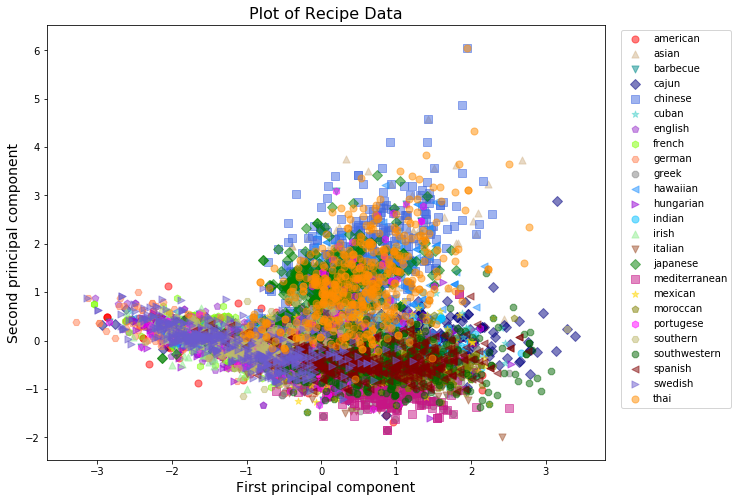

In [98]:
#plt.scatter(counts3_pca[:,0],counts3_pca[:,1],c=test_df.A)
keys = ['american', 'italian', 'asian', 'mexican', 'southern', 'french',
       'southwestern', 'barbecue', 'indian', 'chinese', 'cajun',
       'english', 'mediterranean', 'greek', 'spanish', 'german', 'thai',
       'moroccan', 'irish', 'japanese', 'cuban', 'hawaiian', 'swedish', 
       'hungarian', 'portugese']
color_vals = ['red','sienna','tan','gold','darkkhaki','chartreuse','darkgreen',
              'darkcyan','deepskyblue','royalblue','navy','darkorchid','mediumvioletred',
              'grey','maroon','coral','darkorange','olive','lightgreen','g',
              'mediumturquoise','dodgerblue','slateblue','darkviolet','fuchsia']
colors = dict(zip(keys,color_vals))
markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 3
fig, ax = plt.subplots(figsize=(10,8))
for j, g in enumerate(np.unique(keys)):
    ix = np.where(yummly_df3['cuisine']==g)
    ax.scatter(counts3_pca[ix,0],counts3_pca[ix,1],c=colors[g],label=g,alpha=.5,marker=markers[j],s=50)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2)
ax.set_xlabel("First principal component",fontsize=14)
ax.set_ylabel("Second principal component",fontsize=14)
ax.set_title("Plot of Recipe Data",fontsize=16)
fig.savefig('yummly_recipes_pca_2.png',dpi=300,bbox_inches='tight')

Now I'm going to select a few cuisines that I don't believe to be very similar and plot only those.

In [99]:
select_cuisines = ['indian','japanese','german']

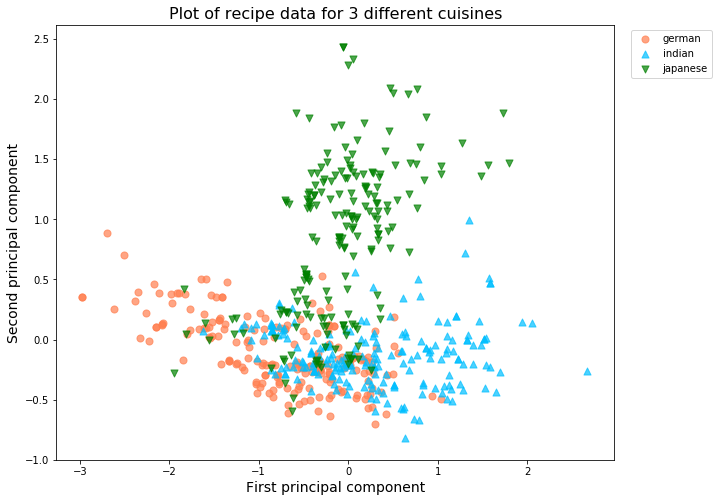

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
for j, g in enumerate(np.unique(select_cuisines)):
    ix = np.where(yummly_df3['cuisine']==g)[0]
    ax.scatter(counts3_pca[ix[:200],0],counts3_pca[ix[:200],1],c=colors[g],label=g,alpha=.7,marker=markers[j],s=50)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2)
ax.set_xlabel("First principal component",fontsize=14)
ax.set_ylabel("Second principal component",fontsize=14)
ax.set_title("Plot of recipe data for 3 different cuisines",fontsize=16)
fig.savefig('yummly_recipes_select_pca.png',dpi=300,bbox_inches='tight')

In [101]:
select_cuisines = ['chinese','mediterranean','english']

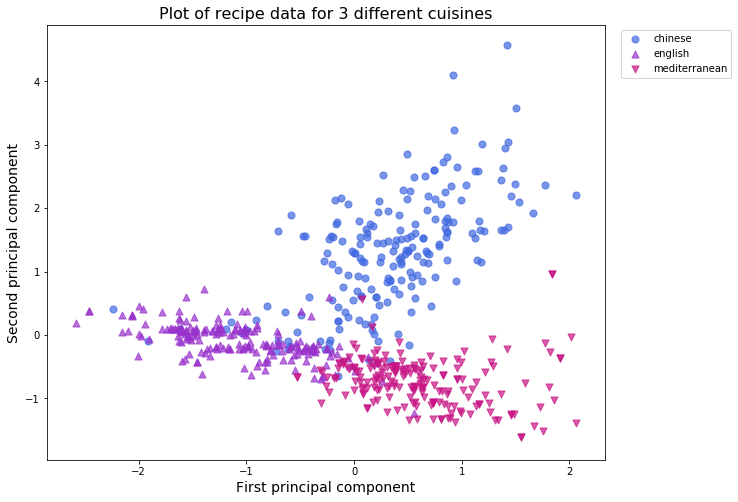

In [102]:
fig, ax = plt.subplots(figsize=(10,8))
for j, g in enumerate(np.unique(select_cuisines)):
    ix = np.where(yummly_df3['cuisine']==g)[0]
    ax.scatter(counts3_pca[ix[:200],0],counts3_pca[ix[:200],1],c=colors[g],label=g,alpha=.7,marker=markers[j],s=50)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2)
ax.set_xlabel("First principal component",fontsize=14)
ax.set_ylabel("Second principal component",fontsize=14)
ax.set_title("Plot of recipe data for 3 different cuisines",fontsize=16)
fig.savefig('yummly_recipes_select2_pca.png',dpi=300,bbox_inches='tight')

Now I'm going to find the centroids for each of the cuisines along the two principal components and only plot the centroids.

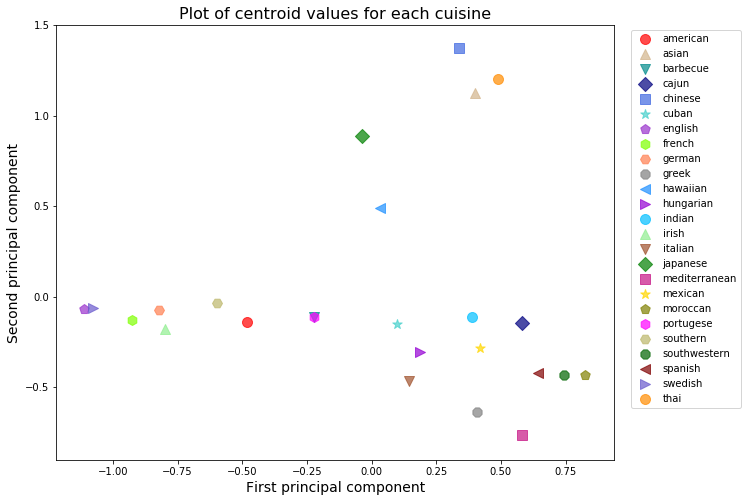

In [103]:
fig, ax = plt.subplots(figsize=(10,8))
for j, g in enumerate(np.unique(keys)):
    ix = np.where(yummly_df3['cuisine']==g)[0]
    ax.scatter(np.mean(counts3_pca[ix,0]),np.mean(counts3_pca[ix,1]),c=colors[g],label=g,alpha=.7,marker=markers[j],s=100)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2)
ax.set_xlabel("First principal component",fontsize=14)
ax.set_ylabel("Second principal component",fontsize=14)
ax.set_title("Plot of centroid values for each cuisine",fontsize=16)
fig.savefig('yummly_recipes_centroids_pca.png',dpi=300,bbox_inches='tight')

In [104]:
pca_df = pd.DataFrame(pca.components_,columns=words3,index=['first','second'])

In [105]:
pca_df.head()

,&,'n,(14.5,(powder),-,0,00,1,1%,1/2,...,yukon,yum,yuzu,za'atar,zatarain’,zero,zest,zesti,ziti,zucchini
first,-0.003545,0.000045,0.000125,0.000149,0.000187,0.000044,-0.000267,0.000034,-0.000134,-0.000083,...,0.002720,0.000042,0.000048,0.000071,0.000088,-0.000049,-0.000418,0.000043,0.000418,0.011387
second,-0.001582,-0.000153,-0.000050,-0.000038,-0.000274,-0.000130,-0.000012,0.000428,-0.000529,0.000004,...,-0.006107,0.000089,0.000220,-0.000486,-0.000091,-0.000041,-0.002258,-0.000212,-0.000560,-0.007862


In [106]:
pca_df.iloc[:, np.argsort(pca_df.loc['first'])[-10:]]

,cumin,cilantro,bell,chili,sauc,olive-oil,tomato,chicken,garlic,onion
first,0.109918,0.112935,0.114220,0.122233,0.181508,0.182260,0.230682,0.240874,0.347041,0.348564
second,-0.060486,0.021262,-0.006669,0.040343,0.624641,-0.188358,-0.186515,0.126800,0.053157,-0.038134


In [107]:
pca_df.iloc[:, np.argsort(pca_df.loc['first'])[:10]]

,sugar,flour,egg,butter,milk,vanilla,all-purpos,extract,cream,unsalt
first,-0.332637,-0.243071,-0.233272,-0.218702,-0.135258,-0.133363,-0.115266,-0.090089,-0.087632,-0.079390
second,0.294820,-0.023297,0.021771,-0.022189,0.029110,0.015918,-0.007400,0.012105,-0.078941,-0.006397


In [108]:
pca_df.iloc[:, np.argsort(pca_df.loc['second'])[-10:]]

,peanut,vinegar,corn-starch,chicken,sesam,rice,ginger,sugar,soy,sauc
first,0.014601,0.056020,0.009938,0.240874,0.030902,0.088499,0.084375,-0.332637,0.065155,0.181508
second,0.079999,0.089011,0.092232,0.126800,0.135157,0.166391,0.174414,0.294820,0.335536,0.624641


In [109]:
pca_df.iloc[:, np.argsort(pca_df.loc['second'])[:10]]

,chees,olive-oil,tomato,parsley,lemon,dri,cream,feta,paprika,oregano
first,0.044672,0.182260,0.230682,0.065376,0.052002,0.062908,-0.087632,0.026970,0.094292,0.06346
second,-0.251597,-0.188358,-0.186515,-0.092208,-0.089180,-0.087285,-0.078941,-0.071849,-0.066926,-0.06582


In [110]:
pca_df.loc[:,'pasta']

first     0.006595
second   -0.012049
Name: pasta, dtype: float64

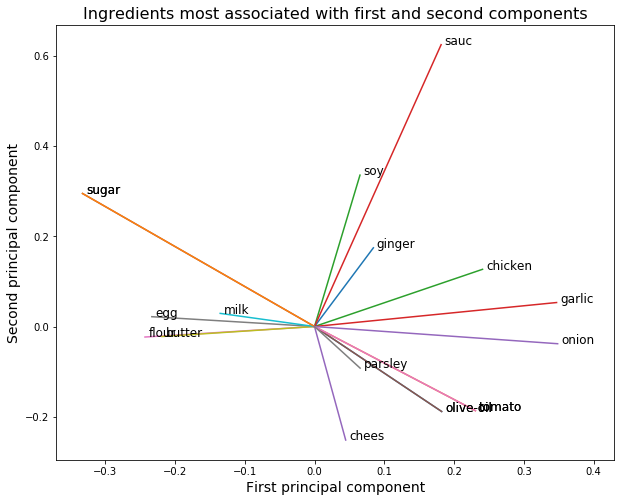

In [111]:
fig, ax = plt.subplots(figsize=(10,8))
select_ingredients = np.empty([18,],dtype=object)
select_ingredients[:5] = pca_df.iloc[:,np.argsort(pca_df.loc['first'])[-5:]].columns
select_ingredients[5:10] = pca_df.iloc[:,np.argsort(pca_df.loc['first'])[:5]].columns
select_ingredients[10:14] = pca_df.iloc[:,np.argsort(pca_df.loc['second'])[-4:]].columns
select_ingredients[14:] = pca_df.iloc[:,np.argsort(pca_df.loc['second'])[:4]].columns
for i in select_ingredients:
    x = [0,pca_df.loc['first',i]]
    y = [0,pca_df.loc['second',i]]
    ax.plot(x,y,label=i)
    ax.text(x[1]+.005,y[1],i,fontsize=12)
ax.set_xlabel("First principal component",fontsize=14)
ax.set_ylabel("Second principal component",fontsize=14)
ax.set_title("Ingredients most associated with first and second components",fontsize=16)
ax.set_xlim([-.37,.43])
fig.savefig('ingredients_vs_components.png',dpi=300)

Now I'm going to do topic modeling using LDA.

In [112]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=25, random_state=0)

In [113]:
yummly_recipe_topics = lda.fit_transform(counts3)

In [114]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 1993)


In [115]:
sorting = np.argsort(lda.components_, axis=1)[:,::-1]
feature_names = np.array(count_vect3.get_feature_names())

In [116]:
mglearn.tools.print_topics(topics=range(10),feature_names=feature_names,sorting=sorting,topics_per_chunk=5,n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
juic          season        olive-oil     garlic        potato        
lime          chicken       garlic        onion         onion         
lemon         cook          tomato        chicken       vinegar       
mint          hot           chees         tomato        mustard       
orang         onion         dri           paprika       garlic        
leav          bell          oregano       cumin         bacon         
sugar         sauc          lemon         olive-oil     butter        
cilantro      rice          onion         powder        olive-oil     
rum           shrimp        feta          clove         beef          
white         chop          cucumb        broth         appl          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
sauc

In [117]:
lda_25 = LatentDirichletAllocation(n_components=25, learning_method="batch", max_iter=25, random_state=0)

In [118]:
yummly_recipe_topics25 = lda_25.fit_transform(counts3)

In [119]:
sorting = np.argsort(lda_25.components_, axis=1)[:,::-1]
feature_names = np.array(count_vect3.get_feature_names())

In [120]:
mglearn.tools.print_topics(topics=range(25),feature_names=feature_names,sorting=sorting,topics_per_chunk=13,n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       topic 5       topic 6       topic 7       topic 8       topic 9       topic 10      topic 11      topic 12      
--------      --------      --------      --------      --------      --------      --------      --------      --------      --------      --------      --------      --------      
lime          rice          dri           chicken       potato        sauc          chicken       egg           flour         spinach       powder        lime          mustard       
cilantro      cook          onion         broth         onion         soy           corn          larg          all-purpos    babi          chili         mint          chees         
juic          pea           garlic        onion         bacon         garlic        breast        flour         butter        free          cumin         juic          mayonnais     
coconut       frozen        season        paprika       cabbag        ginger        c